## Examples of using the Mondrian forest and tree classifiers.

In [1]:
include("Mondrian_Forest_Classifier.jl")

show_mondrian_split_2d

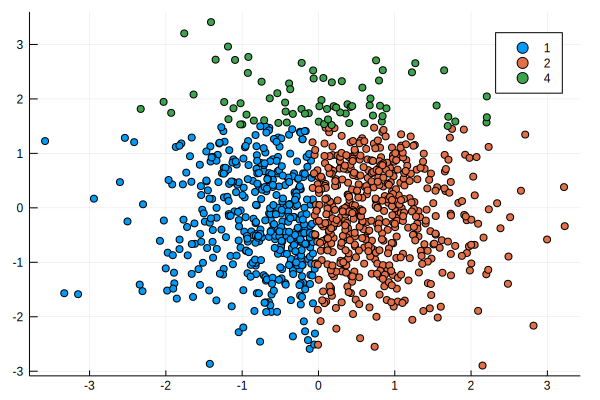

In [2]:
using MLBase
using Plots

function Fakedata3Classif(N,d,N_test=0)
    X = randn((N,d))
    param1 = randn(d)
    param2 = randn(d)
    Y = ( sum(X*param1,2) .> mean(sum(X*param2,2)) )
    Y=convert(Array{Int},Y)
    for i in 1:size(X,1)
        if X[i,2] > 1.5
            Y[i] = 3
        end
    end
    if (N_test > 0)
        x = randn((N_test,d))
        y = ( sum(x*param1,2) .> mean(sum(x*param2,2)) )
        y=convert(Array{Int},y)
        for i in 1:size(x,1)
            if x[i,2] > 1.5
                y[i] = 3
            end
        end
        return X,Y,x,y
    end
    return X,Y
end

X, Y, x, y = Fakedata3Classif(1000,2,1000);
Y = Y.+1;
y = y.+1;

if size(X,2)==2
    plot()
    for class in unique(Y)
        scatter!(X[Y.==class,1],X[Y.==class,2],label="$class")
    end
    plot!()
end

## Mondrian tree classifier

In [3]:
# initialise a mondreian tree classifier object with an empty tree
# and empty data. NB the underlying mondrian tree can be accessed by MT.Tree (see visualisation)
MT = Mondrian_Tree_Classifier()
# trains the tree and sets MT.X and MT.Y to the given training data
train!(MT,X,Y,1e9)

# predict on training and testing
pred=predict!(MT, X)
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))
pred=predict!(MT, x)
println("Accuracy") 
println(correctrate(y,convert(Array{Int,1},pred)))

# give the raw probs
predict_proba!(MT,x[1:10,:])

Train Accuracy
0.901
Accuracy
0.88


10-element Array{Any,1}:
 [1.0, 0.0, 0.0]           
 [0.0, 1.0, 0.0]           
 [0.0, 1.0, 0.0]           
 [NaN, NaN, NaN]           
 [0.0, 1.0, 0.0]           
 [0.0, 1.0, 0.0]           
 [1.0, 0.0, 0.0]           
 [0.5, 0.5, 0.0]           
 [0.923077, 0.0769231, 0.0]
 [0.0, 1.0, 0.0]           

In [4]:
# repl output
MT

Mondrian Tree Classifier:
    Mondrian Tree with 71 leaves

In [5]:
# the data has been added
println(MT.X[1:10,:])
println(MT.Y[1:10])

Mondrian Tree Classifier:
    Mondrian Tree with 71 leaves[-0.203707 0.260218; 0.879127 -0.327939; 0.306334 0.548148; 0.787793 1.24263; 0.160901 -0.620628; 0.895222 1.92828; -1.17154 0.562912; -0.0114475 -0.713906; 1.91374 -1.38157; 0.788176 1.38143]
[1, 2, 1, 1, 2, 4, 1, 2, 2, 1]


## Visualisation

Based on DecisionTree.jl print_tree function. TODO draw with Graphs.jl

In [6]:
MT = Mondrian_Tree_Classifier()
# low λ value to show the plotting
train!(MT,X,Y,0.2)
pred=predict!(MT, X)
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))

# print the text based vis
print_mondrian_tree(get(MT.Tree.root))

Train Accuracy
0.707
τ: 0.013
L-> τ: 0.089
    L-> τ: 0.169
        L-> Prediction: [0.714, 0.286, 0.0]
        R-> Prediction: [0.291, 0.709, 0.0]
    R-> τ: 0.144
        L-> Prediction: [0.001, 0.999, 0.0]
        R-> τ: 0.196
            L-> Prediction: [0.153, 0.847, 0.0]
            R-> Prediction: [NaN, NaN, NaN]
R-> Prediction: [0.001, 0.999, 0.0]


### The splits can be visualised for an individual Mondrian_Tree_Classifier

Here a plot and animation are returned, plot is the final still. If animation=false
then a one frame animation and plot are returned (both the final plot).

In [7]:
X, Y, x, y = FakedataClassif(100,2,25);
Y = Y.+1;
y = y.+1;

MT = Mondrian_Tree_Classifier()
train!(MT,X,Y,1e6)
pred=predict!(MT, X)
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))

# plots the splits for a Mondrian_Tree_Classifier in 2_d could do
# higher d but would only plot dimension 1,2
f,a = show_mondrian_split_2d(MT,Data=true,animation=true);
gif(a,"resources/MT.gif",fps=1)

Train Accuracy
0.9


INFO: Saved animation to /home/harvey/Group Project/warwick-rsg/MondrianForest/resources/MT.gif


Plots.AnimatedGif("/home/harvey/Group Project/warwick-rsg/MondrianForest/resources/MT.gif")

# Mondrian Forest classifier

Python has $\sim 27 - 33$ seconds runtime, $\sim 276-619$ MiB of memory allocations, and about $0.8-0.92$ accuracy on an
equivalent problem

See [python comparison](comparisons/python_comp.ipynb) and the plots below. S


![alt text](comparisons/n_tree_scale.png)

Yet to update data scale with paused mondrians and parallel training

![alt text](comparisons/n_data_scale.png)

In [16]:
X, Y, x, y = FakedataClassif(5000,5,1000);
Y = Y.+1;
y = y.+1;

# creates a mondrian forest classifier with 100 mondrian tree classifiers
MF = Mondrian_Forest_Classifier(50)
# time and memory separately
tic()
train!(MF, X, Y, 1e9)
toc()
# prediction is greatest time hog
tic()
pred=predict!(MF, X);
toc()
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))
pred=predict!(MF, x)
println("Accuracy") 
println(correctrate(y,convert(Array{Int,1},pred)))

MF = Mondrian_Forest_Classifier(50)
println("Allocations: ", @allocated(train!(MF,X,Y,1e9))/1e6, " Mb")

elapsed time: 0.000200045 seconds
elapsed time: 1.46275975 seconds
Train Accuracy
0.977
Accuracy
0.953
Allocations: 0.002416 Mb


In [17]:
X, Y, x, y = FakedataClassif(150,2,50);
Y = Y.+1;
y = y.+1;

MF = Mondrian_Forest_Classifier(10)

train!(MF, X, Y, 1e9)
pred = predict!(MF,x)

println("Accuracy")
println(correctrate(y,convert(Array{Int,1},pred)))

LoadError: [91mmode: input array cannot be empty.[39m

In [6]:
predict_proba!(MF,x[1:10,:])

10-element Array{Array{Float64,1},1}:
 [0.623151, 0.376849]
 [0.809227, 0.190773]
 [0.531516, 0.468484]
 [0.566078, 0.433922]
 [0.356871, 0.643129]
 [0.178749, 0.821251]
 [0.78418, 0.21582]  
 [0.824278, 0.175722]
 [0.654293, 0.345707]
 [0.623516, 0.376484]

In [14]:
# repl output
MF

Mondrian Forest Classifier with 512 Mondrian trees:
    Mondrian Tree with 134 leaves
    Mondrian Tree with 57 leaves
    Mondrian Tree with 127 leaves
    Mondrian Tree with 66 leaves
    Mondrian Tree with 116 leaves
    Mondrian Tree with 83 leaves
    Mondrian Tree with 72 leaves
    Mondrian Tree with 77 leaves
    Mondrian Tree with 114 leaves
    Mondrian Tree with 100 leaves
    Mondrian Tree with 84 leaves
    Mondrian Tree with 135 leaves
    Mondrian Tree with 42 leaves
    Mondrian Tree with 83 leaves
    Mondrian Tree with 85 leaves
    Mondrian Tree with 121 leaves
    Mondrian Tree with 61 leaves
    Mondrian Tree with 70 leaves
    Mondrian Tree with 125 leaves
    Mondrian Tree with 62 leaves
    Mondrian Tree with 90 leaves
    Mondrian Tree with 43 leaves
    Mondrian Tree with 57 leaves
    Mondrian Tree with 88 leaves
    Mondrian Tree with 93 leaves
    Mondrian Tree with 88 leaves
    Mondrian Tree with 113 leaves
    Mondrian Tree with 118 leaves
    Mondrian T

# MLBase Gridtune

Something is wrong here

In [13]:
d=2
X, Y, x, y = FakedataClassif(1000,d,100);
Y = Y.+1;
y = y.+1;

# Currently adding @parallel to the for loop in train! causes
# train! within MLBase's gridtune to be unable to modify the
# Mondrian_Forest_Classfier Trees array....
function train_for_mlbase!(MF::Mondrian_Forest_Classifier,
                X::Array{Float64,2},
                Y::Array{Int64},
                λ::Float64=1e9)

    for i in 1:MF.n_trees
        MT = Mondrian_Tree_Classifier()
        train!(MT, X, Y, λ)
        push!(MF.Trees,MT)
    end
    MF.X = X
    MF.Y = Y
end

function estfun(n_trees,λ)
    MF = Mondrian_Forest_Classifier()
    train_for_mlbase!(MF,X,Y,λ)
    return MF
end

function evalfun(MF)
    return correctrate(y, predict!(MF,x))
end

@time best_model, best_config, best_score = gridtune(estfun, 
                                               evalfun, 
                                               ("n_trees",[10,100,250,500]),
                                               ("λ",[1e1,1e2,1e4,1e8,1e16]),
                                               verbose=true
)
println("\nBest Configuration: ", best_config)
println("\nBest score: ", best_score)

[n_trees=10, λ=10.0] => 0.98
[n_trees=100, λ=10.0] => 0.97
[n_trees=250, λ=10.0] => 0.97
[n_trees=500, λ=10.0] => 0.95
[n_trees=10, λ=100.0] => 0.98
[n_trees=100, λ=100.0] => 1.0
[n_trees=250, λ=100.0] => 0.99
[n_trees=500, λ=100.0] => 0.98
[n_trees=10, λ=10000.0] => 0.99
[n_trees=100, λ=10000.0] => 0.97
[n_trees=250, λ=10000.0] => 0.97
[n_trees=500, λ=10000.0] => 0.98
[n_trees=10, λ=1.0e8] => 0.99
[n_trees=100, λ=1.0e8] => 0.97
[n_trees=250, λ=1.0e8] => 0.99
[n_trees=500, λ=1.0e8] => 0.96
[n_trees=10, λ=1.0e16] => 0.98
[n_trees=100, λ=1.0e16] => 0.97
[n_trees=250, λ=1.0e16] => 0.97
[n_trees=500, λ=1.0e16] => 0.96
  3.198801 seconds (29.16 M allocations: 899.576 MiB, 9.70% gc time)

Best Configuration: (100, 100.0)

Best score: 1.0


This benchmark is a little unbelievable... but the accuracy is still good, perhaps it is the
paused mondrians (the python does use these though) or Julia's time function is not working 

4.9071e-5
  0.001064 seconds (44.17 k allocations: 795.609 KiB)
2
3.9404e-5
  0.002129 seconds (73.45 k allocations: 1.268 MiB)
4
3.3339e-5
  0.004688 seconds (166.29 k allocations: 2.772 MiB)
8
3.39e-5
  0.008875 seconds (321.55 k allocations: 5.317 MiB)
16
3.6788e-5
  0.016227 seconds (581.54 k allocations: 9.641 MiB)
32
3.836e-5
  0.040211 seconds (1.28 M allocations: 20.981 MiB)
64
4.0308e-5
  0.227076 seconds (2.42 M allocations: 39.812 MiB, 68.85% gc time)
128
3.545e-5
  0.322629 seconds (4.93 M allocations: 80.985 MiB, 59.49% gc time)
256
3.3382e-5
  0.519351 seconds (9.94 M allocations: 162.939 MiB, 50.58% gc time)
512
Any[4.9071e-5, 3.9404e-5, 3.3339e-5, 3.39e-5, 3.6788e-5, 3.836e-5, 4.0308e-5, 3.545e-5, 3.3382e-5]
Any[0.79, 0.88, 0.81, 0.85, 0.93, 0.92, 0.91, 0.93, 0.93]


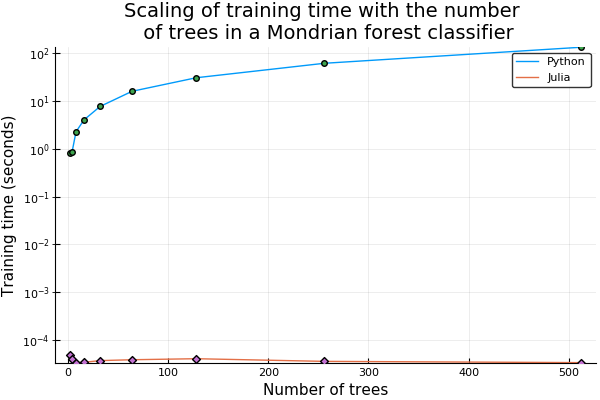

In [12]:
d=5
X, Y, x, y = FakedataClassif(1000,d,100);
Y = Y.+1;
y = y.+1;

time = []
acc = []
trees = []
for j in collect(1:9)
    push!(trees,2^j)
    MF = Mondrian_Forest_Classifier(2^j)
    tic()
    train!(MF,X,Y,1e9)
    t = toq()
    println(t)
    push!(time,t)
    @time pred=predict!(MF, x);
    push!(acc,correctrate(y,convert(Array{Int,1},pred)))
    println(MF.n_trees)
end

println(time)
println(acc)

using CSV
times_py = convert(Array{Float64,1},CSV.read("comparisons/times_py")[2])
pyplot()

plot(trees,times_py,label="Python", yscale=:log10)
plot!(trees,time,label="Julia", yscale=:log10)
scatter!(trees,times_py,label="")
scatter!(trees,time,label="",markershape=:auto)
title!("Scaling of training time with the number \n of trees in a Mondrian forest classifier")
xlabel!("Number of trees")
ylabel!("Training time (seconds)")